<a href="https://colab.research.google.com/github/VinnyRosa/Alura-Challenge-DS/blob/main/Projeto_Alura_Challenge_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados(Challenge Alura semana 2)

Nessa etapa, o dataset tratado será importado e utilizado para que sejam realizadas as análises e visualizações, afim de que sejam levantadas as informações chave que relatem possíveis causas do churn rate estar elevado

## Preparação para Análise

In [1]:
# código de importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importando os dados tratados da base
dataset = pd.read_json('Dataset_Challenge')
dataset

,IDcliente,Evasao,Genero,Senioridade,Parceiro,Depedentes,Permanencia,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,...,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Tarifa_mensal,Tarifa_Total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Boleto bancário,65.60,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Boleto bancário,59.90,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Pagamento Virtual,73.90,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Pagamento Virtual,98.00,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Boleto bancário,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,...,Não,Não,Sim,Não,Não,Anual,Não,Boleto bancário,55.15,742.90
7028,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra óptica,...,Não,Não,Não,Não,Sim,Mensal,Sim,Pagamento Virtual,85.10,1873.70
7029,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,...,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto bancário,50.30,92.75
7030,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,...,Não,Sim,Sim,Não,Sim,Bianual,Não,Boleto bancário,67.85,4627.65


## Análise Quantitativa

Primeiramente fiz a geração de algumas visualizações em boxplot para analisar a relação do Churn com os dados quantitativos principais do dataset(Permanencia, Tarifa Mensal e Tarifa Total).

Podemos perceber algumas características importantes sobre os clientes que saem da empresa: eles possuem pouco tempo de contratação dos serviços de telefonia, e as tarifas mensais pagas por esses clientes são superiores aos dos clientes que não cancelaram seus contratos

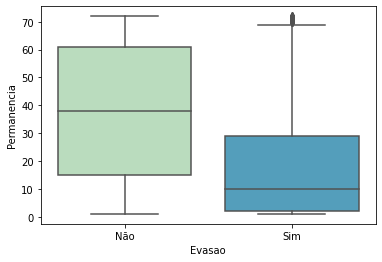

In [17]:
sns.boxplot(x='Evasao', y='Permanencia', data=dataset, palette='GnBu')

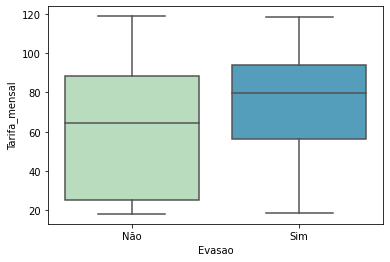

In [18]:
sns.boxplot(x='Evasao', y='Tarifa_mensal', data=dataset, palette='GnBu')

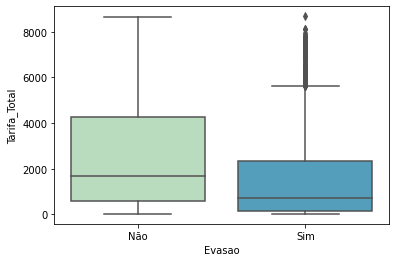

In [19]:
sns.boxplot(x='Evasao', y='Tarifa_Total', data=dataset, palette='GnBu')

## Análise Qualitativa

Para as próximas visualizações, fiz uma manipulação no dataset principal para que as informações possam ser utilizadas para gerar uma matriz de correlação, afim de que uma análise dos dados discretos sejam realizados

In [7]:
# código escrito para preparar as informações do dataset para gerar a matriz de correlação
transformar = {
    'Não': 0.0,
    'Sim': 1.0,
    'sem serviço': 2.0,
    'Feminino': 0.0,
    'Masculino': 1.0,
    'DSL': 1.0,
    'Fibra óptica': 2.0,
    'Anual': 0.0,
    'Mensal': 1.0,
    'Bianual': 2.0,
    'Boleto bancário': 0.0,
    'Pagamento Virtual': 1.0,
    'débito automático(crédito)': 2.0,
    'débito automático': 3.0
}

colunas = [
    'Evasao', 'Genero', 'Senioridade', 'Parceiro',
    'Depedentes', 'Serviço_Movel', 'Multiplas_Linhas',
    'Serviço_Internet', 'Segurança_Online', 'Backup_Online',
    'Proteção_Dispositivo', 'Suporte_Tecnico', 'TV_a_Cabo',
    'Serviço_Filmes', 'Contrato', 'Fatura_Digital', 'Metodo_Pagamento',
]
dataset_grafico = dataset[colunas].astype(dtype='category')
dataset_grafico.head()
data_teste = pd.DataFrame(columns=colunas)
for coluna in colunas:
    data_teste[coluna] = dataset_grafico[coluna].map(transformar, na_action='ignore')
data_teste.head()
#variaveis categóricas transformadas para numeros, com o objetivo de utilizar esses valores para modelar gráficos

,Evasao,Genero,Senioridade,Parceiro,Depedentes,Serviço_Movel,Multiplas_Linhas,Serviço_Internet,Segurança_Online,Backup_Online,Proteção_Dispositivo,Suporte_Tecnico,TV_a_Cabo,Serviço_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [8]:
# conversão do tipo das variáveis para plotagem do gráfico
for col in ['Evasao', 'Genero', 'Senioridade', 'Parceiro', 'Depedentes', 'Serviço_Movel', 'Multiplas_Linhas', 'Segurança_Online', 'Backup_Online', 'Proteção_Dispositivo', 'Suporte_Tecnico', 'TV_a_Cabo', 'Serviço_Filmes', 'Serviço_Internet', 'Contrato', 'Fatura_Digital', 'Metodo_Pagamento']:
  data_teste[col] = data_teste[col].astype('float')

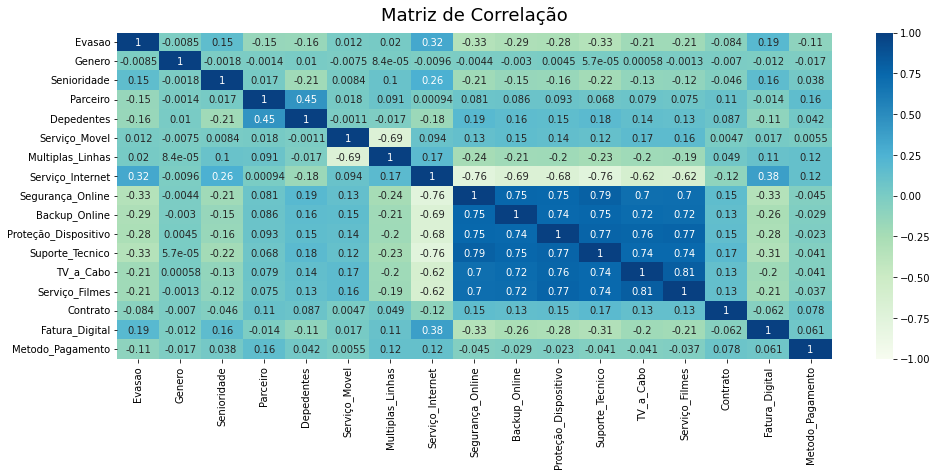

In [24]:
# Gráfico da matriz de correlação
correlacao = data_teste.corr()
plt.figure(figsize=(16, 6))
mapacalor = sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True, cmap='GnBu')
mapacalor.set_title('Matriz de Correlação', fontdict={'fontsize':18}, pad=12)
mapacalor

Dentre as características relacionadas ao Churn(Evasão), percebemos que existrem algumas características diretamente e inversamente relacionadas ao Churn em si.

Podemos perceber que os serviços secundários de internet(Segurança_Online, Backup_Online, Proteção_Dispositivo, Suporte_Tecnico, TV_a_Cabo e Serviço_Filmes) são bem aceitos pela base de clientes, e não estão diretamente relacionados ao Churn



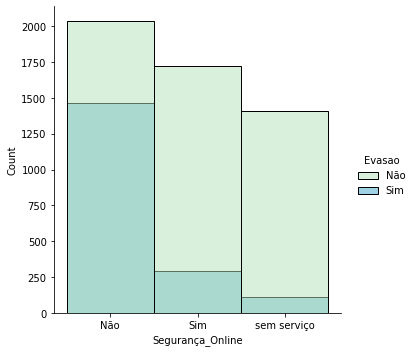

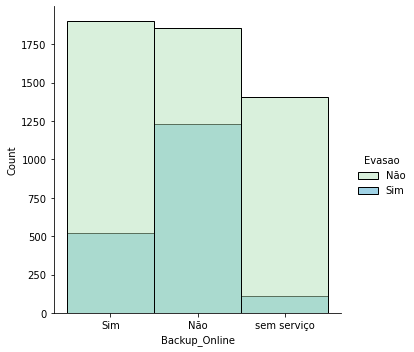

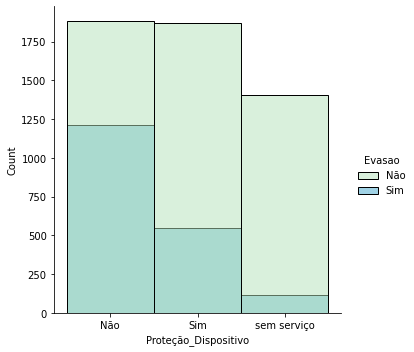

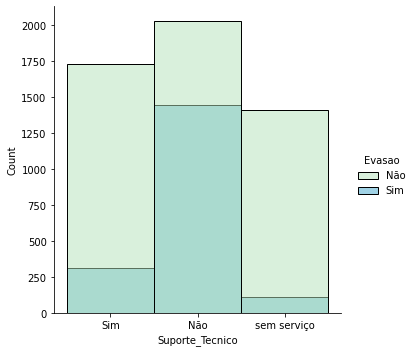

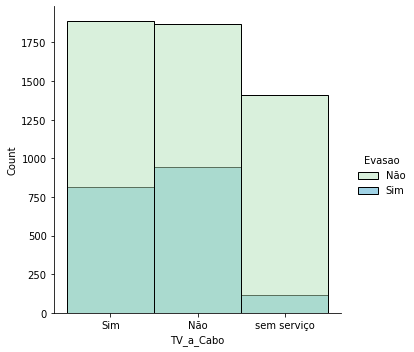

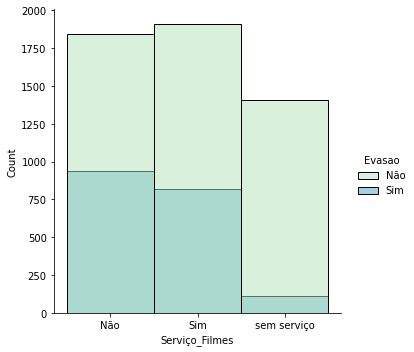

In [20]:
# Geração dos gráficos com correlação inversamente proporcional
lista_inverso = ['Segurança_Online', 'Backup_Online', 'Proteção_Dispositivo', 'Suporte_Tecnico', 'TV_a_Cabo', 'Serviço_Filmes']

for col in lista_inverso:
  sns.displot(data=dataset, x=col, hue='Evasao', kind='hist', palette='GnBu')

Já quando olhamos os fatores diretamente relacionados ao aumento do Churn, percebemos que eles estão relacionados as características de: Senioridade, Serviço_Internet, e Fatura_Digital.

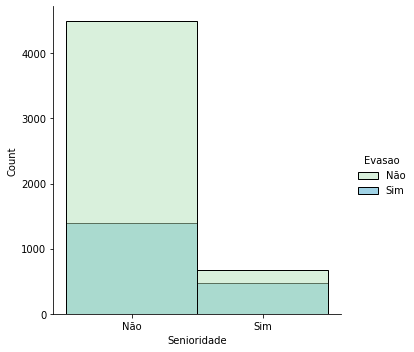

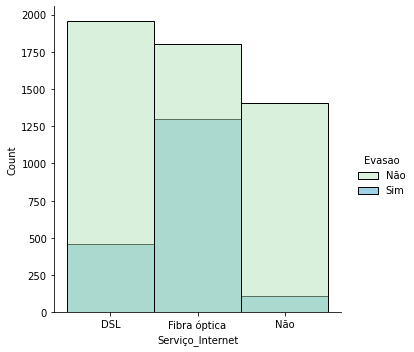

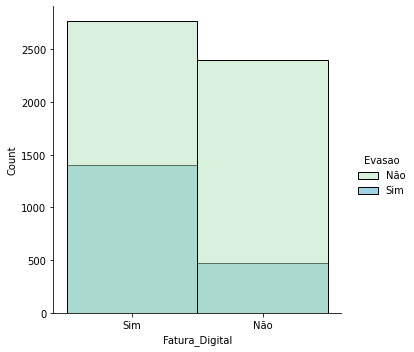

In [21]:
# Geração dos gráficos com correlação diretamente proporcional
lista_direto = ['Senioridade', 'Serviço_Internet', 'Fatura_Digital']

for col in direto:
  sns.displot(data=dataset, x=col, hue='Evasao', kind='hist', palette='GnBu')

## Conclusões

Diante do observado acima, alguns pontos podem ser levantados, sobre possíveis causas do Churn estar ocorrendo:
- resistência em relação à um possível aumento de preço das tarifas do serviço de internet prestado
- alteração no pacote do serviço, o que pode ter comprometido a qualidade do serviço de internet prestado(esse fator pode estar diretamente relacionado ao preço, visto que caso o preço suba muito, o cliente pode ser forçado a contratar uma franquia menor de internet, caso deseje permanecer na empresa)
- ausência de ferramentas de acessibilidade para públicos específicos(como idosos ou pessoas com deficiência)

Essas foram algumas observações que pude pensar, que podem servir como base para estudos futuros. Com essas conclusões, já é possível dar luz a pontos que o gestor do negócio possa considerar para resolver a questão